In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import matplotlib.pyplot as plt
import folium
import json
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Creating path string
path = r'C:\Users\Alex Lam\Desktop\Career Foundary\Citi Bike Analysis'

In [3]:
#Importing datasets
df_citi_bike = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citi bike prepared 2.csv'))

# 3. Cleaning Data

In [4]:
df_citi_bike.columns

Index(['Unnamed: 0', 'day_of_week', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'end_date',
       'end_hour', 'trip_duration_min', 'Age Group', 'Trip Duration Group',
       'Day of the Week Label'],
      dtype='object')

In [24]:
df_citi_bike = df_citi_bike.drop(columns = ['Unnamed: 0'])

# 4. Exploring Data

Text(0, 0.5, 'Trip Duration')

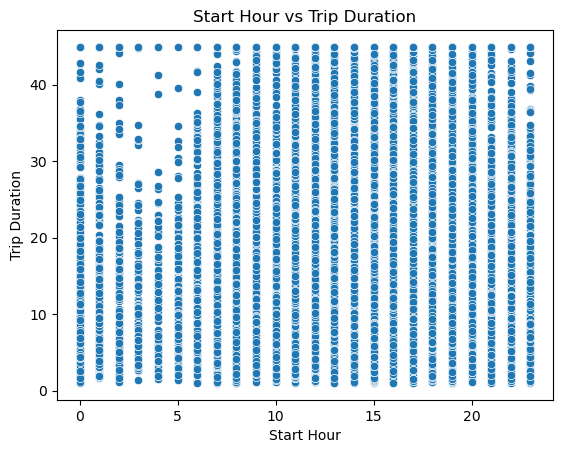

In [25]:
#Scatterplot start hour vs trip duration min
sns.scatterplot(x = 'start_hour', y = 'trip_duration_min',data = df_citi_bike)
plt.title('Start Hour vs Trip Duration')
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')

In [28]:
#Sample dataset needed as scatterplot above has too many points
sample_set = df_citi_bike.sample(n=5000)

In [29]:
sample_set.head()

,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,...,trip_duration,subscriber,birth_year,gender,end_date,end_hour,trip_duration_min,Age Group,Trip Duration Group,Day of the Week Label
18874,Wed,14,2013-09-11 14:20:14,327,Vesey Pl & River Terrace,40.715338,-74.016584,2013-09-11 20:00:28,267,Broadway & W 36 St,...,2697,Non-Subscriber,NaN,NaN,2013-09-11,20,44.950000,Middle Aged,Long,3
14437,Mon,22,2013-09-30 22:50:48,504,1 Ave & E 15 St,40.732219,-73.981656,2013-09-30 22:56:19,537,Lexington Ave & E 24 St,...,331,Subscriber,1978.0,M,2013-09-30,22,5.516667,Young,Short,1
7685,Tue,10,2013-09-17 10:10:21,447,8 Ave & W 52 St,40.763707,-73.985162,2013-09-17 10:14:54,520,W 52 St & 5 Ave,...,273,Subscriber,1960.0,M,2013-09-17,10,4.550000,Middle Aged,Short,2
15120,Mon,13,2013-09-30 13:20:53,394,E 9 St & Avenue C,40.725213,-73.977688,2013-09-30 13:40:18,320,Church St & Leonard St,...,1165,Subscriber,1969.0,M,2013-09-30,13,19.416667,Middle Aged,Medium,1
6946,Sun,19,2013-09-01 19:06:00,405,Washington St & Gansevoort St,40.739323,-74.008119,2013-09-01 19:23:45,382,University Pl & E 14 St,...,1065,Subscriber,1986.0,F,2013-09-01,19,17.750000,Young,Medium,7


Text(0, 0.5, 'Trip Duration')

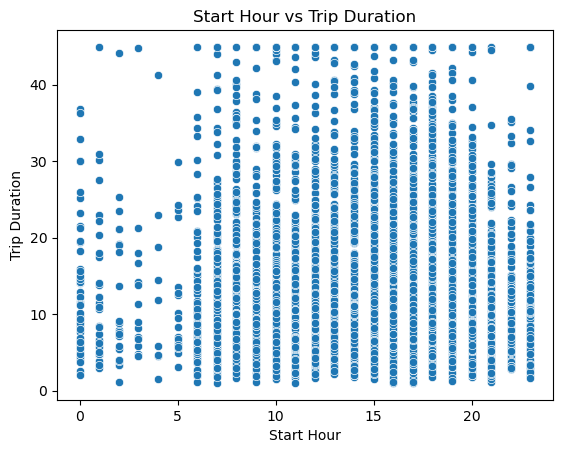

In [38]:
#Sample set output
sns.scatterplot(x = 'start_hour', y = 'trip_duration_min',data = sample_set)
plt.title('Start Hour vs Trip Duration')
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')

# 5. Hypothesis

Based on sample size, people ride longer and have more rides from start hour 13 to 19.

# 6. Reshaping variables

In [30]:
#Reshaping variables into numpy arrays for regression 
X = sample_set['start_hour'].values.reshape(-1, 1)
y = sample_set['trip_duration_min'].values.reshape(-1, 1)

In [31]:
#Checking output
x

array([[18],
       [18],
       [19],
       ...,
       [18],
       [13],
       [21]], dtype=int64)

# 7. Splitting data into training set and test set 

In [32]:
#Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [34]:
#Create a regression object
regression = LinearRegression()

In [35]:
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
y_predicted = regression.predict(X_test)

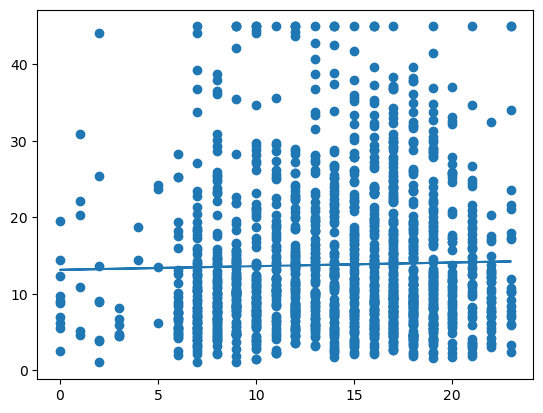

In [44]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predicted)

In [45]:
# Create objects for model mean squared error and R2 score
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [69]:
print('Slope: ' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[0.04787412]]
Mean squared error:  90.17348803566573
R2 score:  0.001715516976726783


In [48]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9.666667,13.717451
1,9.883333,14.004696
2,7.183333,13.621703
3,12.116667,13.573829
4,15.000000,13.717451
5,7.000000,13.717451
6,19.516667,13.765325
7,11.466667,14.052570
8,27.866667,13.861074
9,44.950000,13.621703


The model is not very accurate, since the predicted model's numbers are very different from the actual numbers.The slope shows only a slight positive correlation between the start hour and trip duration variables. The MSE has a large value meaning the estimated values and true values are very far apart. The R2 metric is very close to 0 meaning the model is a poor fit.

In [56]:
#Subset to prove the time range hour 13 to 19 has an increase in trips and trip duration
#Range set from 10 to 22 to show change in trip_duration_min variable
Set_limited = df_citi_bike[(df_citi_bike['start_hour'] >= 10) & (df_citi_bike['start_hour'] <= 22) ]

In [57]:
Set_limited

,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,...,trip_duration,subscriber,birth_year,gender,end_date,end_hour,trip_duration_min,Age Group,Trip Duration Group,Day of the Week Label
0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,...,993,Subscriber,1968.0,F,2013-09-09,18,16.550000,Middle Aged,Medium,1
1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,...,581,Subscriber,1983.0,M,2013-09-12,18,9.683333,Young,Short,4
2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,...,361,Subscriber,1989.0,M,2013-09-18,19,6.016667,Young,Short,3
3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,...,561,Subscriber,1988.0,F,2013-09-28,12,9.350000,Young,Short,6
4,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,...,2296,Non-Subscriber,NaN,NaN,2013-09-07,18,38.266667,Middle Aged,Long,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,478,11 Ave & W 41 St,...,2697,Non-Subscriber,NaN,NaN,2013-09-21,20,44.950000,Middle Aged,Long,6
49996,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,151,Cleveland Pl & Spring St,...,1191,Subscriber,1970.0,F,2013-09-14,17,19.850000,Middle Aged,Medium,6
49997,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,524,W 43 St & 6 Ave,...,1050,Subscriber,1961.0,F,2013-09-07,18,17.500000,Middle Aged,Medium,6
49998,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,373,Willoughby Ave & Walworth St,...,2697,Non-Subscriber,NaN,NaN,2013-09-07,14,44.950000,Middle Aged,Long,6


In [58]:
sample_set_limited = Set_limited.sample(n = 5000)

Text(0, 0.5, 'Trip Duration')

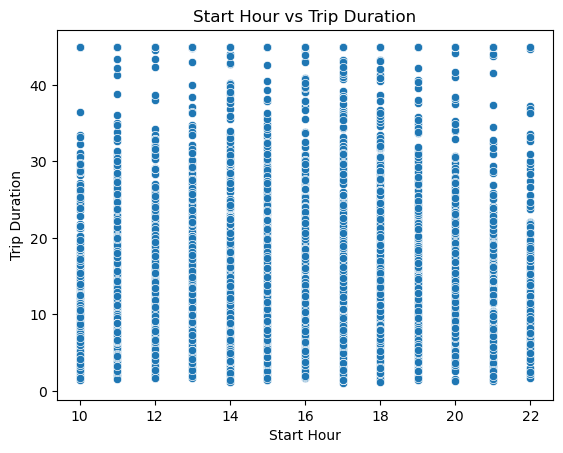

In [59]:
sns.scatterplot(x = 'start_hour', y = 'trip_duration_min',data = sample_set_limited)
plt.title('Start Hour vs Trip Duration')
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')

In [60]:
#Reshaping variables into numpy arrays for regression 
X = sample_set_limited ['start_hour'].values.reshape(-1, 1)
y = sample_set_limited ['trip_duration_min'].values.reshape(-1, 1)

In [61]:
#Checking output
x

array([[18],
       [18],
       [19],
       ...,
       [18],
       [13],
       [21]], dtype=int64)

In [62]:
#Split data into training set and test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [63]:
regression_2 = LinearRegression()

In [64]:
regression_2.fit(X_train, y_train)

LinearRegression()

In [65]:
y_predicted_2 = regression.predict(X_test)

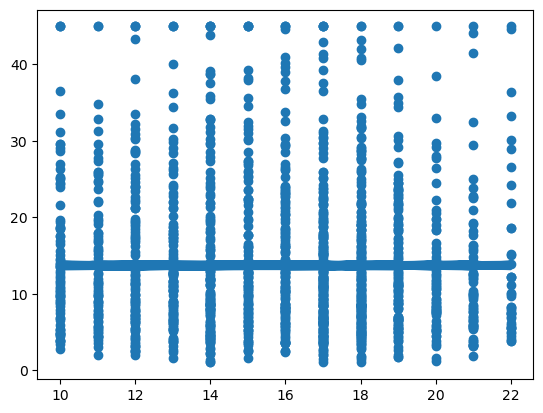

In [67]:
plt.scatter(X_test_2, y_test_2)
plt.plot(X_test_2, y_predicted_2)

In [68]:
rmse_2 = mean_squared_error(y_test_2, y_predicted_2)
r2_2 = r2_score(y_test_2, y_predicted_2)

In [71]:
print('Slope: ' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope:  [[0.04787412]]
Mean squared error:  98.22110684669157
R2 score:  -0.004733187854333298


In [72]:
data_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data_2.head(30)

,Actual,Predicted
0,44.950000,13.717451
1,6.300000,14.004696
2,33.733333,13.621703
3,8.733333,13.573829
4,32.816667,13.717451
5,13.766667,13.717451
6,12.200000,13.765325
7,13.466667,14.052570
8,29.750000,13.861074
9,7.633333,13.621703


The alternate model is worse off in all categories compared to the previous model. Starting hour and trip duration probably do not have a strong relationship.